# K-Means and Customer Segmentation

In my previous article, I talked about Customer Segmentation with RFM technique. I will talk about Customer Segmentation again. But, this time, I will use an unsupervised machine learning algorithm: K-Means Clustering.

## What is K-Means Clustering Algorithm?

K-Means Clustering is an unsupervised learning algorithm that is used to solve the clustering problems in machine learning. This algorithm tries to group similar items in the form of clusters. The number of groups is represented by K. Here K defines the number of pre-defined clusters that need to be created in the process, as if K=2, there will be two clusters.

## How to Perform?

To perform K-Means clustering, all data points are grouped into k number of clusters, each of which is represented by its centroids. The centroid of a cluster is often a mean of all data points in that cluster.

The data points in a cluster are closest to the centroids of that cluster. There is a high similarity between data points in a cluster and data points from one cluster is dissimilar to the data points of another cluster. The similarity of the cluster assignments is determined by computing the sum of the squared error (SSE) after the centroids converge. The SSE is defined as the sum of the squared Euclidean distances of each point to its closest centroid. Since this is a measure of error, the objective of k-means is to try to minimize this value.

## The steps of K-Means are:

![](https://miro.medium.com/max/1400/1*OwcEPrzjtujG0LvD60iFRw.png)

## Customer Segmentation with K-Means

We use Online Retail dataset as in the previous article.

In [1]:
import datetime as dt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Install openpyxl if necessary

In [3]:
!pip install openpyxl --quiet

Read the dataset.

In [4]:
df = pd.read_excel('/content/online_retail_II.xlsx', sheet_name='Year 2010-2011')

Let's prepare the data as in the previous notebooks.

In [5]:
df.dropna(inplace=True)
df = df[~df['Invoice'].str.contains('C', na=False)]
df = df[(df['Quantity'] > 0)]
df = df[(df['Price'] > 0)]

In [6]:
df['TotalPrice'] = df['Quantity'] * df['Price']

In [7]:
rfm = df.groupby('Customer ID').agg({
                              'InvoiceDate': lambda InvoiceDate: (dt.datetime(2011, 12, 11) - InvoiceDate.max()).days,
                              'Invoice': lambda Invoice: Invoice.nunique(),
                              'TotalPrice': lambda TotalPrice: TotalPrice.sum()})

In [8]:
rfm.columns = ['recency', 'frequency', 'monetary']

In [9]:
sc = MinMaxScaler((0, 1))
rfm_ = sc.fit_transform(rfm)

In [10]:
kmeans = KMeans(n_clusters=4)
k_fit = kmeans.fit(rfm_)

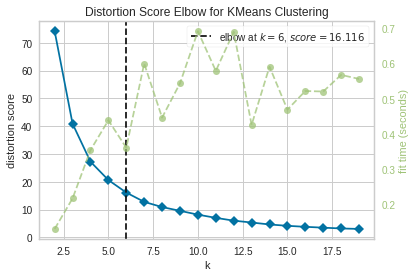

In [11]:
kmeans = KMeans()
elbow = KElbowVisualizer(kmeans, k=(2, 20))
elbow.fit(rfm_)
elbow.show()

In [12]:
kmeans = KMeans(n_clusters=elbow.elbow_value_).fit(rfm_)

In [13]:
clusters = kmeans.labels_

In [14]:
segments = pd.DataFrame({"Customer": rfm.index, "Cluster": clusters})

In [15]:
rfm["cluster_no"] = clusters
rfm["cluster_no"] = rfm["cluster_no"] + 1

In [16]:
rfm.head()

,recency,frequency,monetary,cluster_no
Customer ID,,,,
12346.0,326,1,77183.60,2
12347.0,3,7,4310.00,1
12348.0,76,4,1797.24,5
12349.0,19,1,1757.55,1
12350.0,311,1,334.40,2
